In [ ]:
!wget https://github.com/sanskrutirajput/STOCK_DATASET/blob/main/HDFC.csv?raw=true

--2021-10-13 07:36:19--  https://github.com/sanskrutirajput/STOCK_DATASET/blob/main/HDFC.csv?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sanskrutirajput/STOCK_DATASET/raw/main/HDFC.csv [following]
--2021-10-13 07:36:19--  https://github.com/sanskrutirajput/STOCK_DATASET/raw/main/HDFC.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sanskrutirajput/STOCK_DATASET/main/HDFC.csv [following]
--2021-10-13 07:36:20--  https://raw.githubusercontent.com/sanskrutirajput/STOCK_DATASET/main/HDFC.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model

%matplotlib inline

In [ ]:
df= pd.read_csv('/content/HDFC.csv?raw=true')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [ ]:
### DATA PREPROCESSING


In [ ]:
df.drop('Date',axis=1,inplace=True)
df.drop('Symbol',axis=1,inplace=True)
df.drop('Series',axis=1,inplace=True)

In [ ]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [ ]:
df.shape

(5306, 12)

In [ ]:
### Fill NAN Values


In [ ]:
df.drop('Trades', axis=1, inplace=True)

In [ ]:
df['Deliverable Volume'].fillna(df['Deliverable Volume'].median(),inplace=True)
df['%Deliverble'].fillna(df['%Deliverble'].mean(),inplace=True)

In [ ]:
df.isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
### PLotting The GRAPH

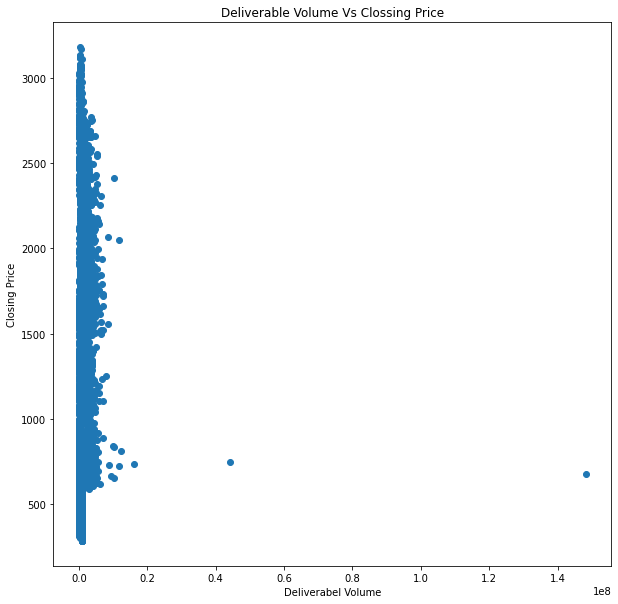

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df['Deliverable Volume'],df['Close'])
ax.set(title="Deliverable Volume Vs Clossing Price",
       xlabel="Deliverabel Volume",
       ylabel="Closing Price");

In [ ]:
df["Deliverable Volume"]=pd.to_datetime(df.Deliverable Volume,format="%Y-%m-%d")
df.index=df['Deliverable Volume']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

SyntaxError: ignored

In [ ]:
### splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('Close', axis=1)
Y=df['Close']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
Y_train[:5]

2284    1433.60
5096    1754.65
602      594.80
1215     649.65
2092    2732.40
Name: Close, dtype: float64

In [ ]:
X_train[:5]

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
2284,1498.55,1485.00,1490.00,1422.1,1424.00,1451.14,1467526,2.129582e+14,912529.0,0.6218
5096,1741.15,1751.15,1792.70,1747.2,1761.00,1771.08,6325246,1.120253e+15,2913361.0,0.4606
602,594.90,594.00,601.20,561.1,594.95,594.05,99684,5.921774e+12,1021574.0,0.6944
1215,629.85,637.80,651.00,632.0,649.25,645.05,416185,2.684612e+13,316683.0,0.7609
2092,2722.90,2725.00,2765.95,2712.1,2726.90,2735.37,583458,1.595975e+14,369129.0,0.6327


In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
corr_mat=df.corr()
corr_mat

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.998656,0.998095,0.998008,0.997662,0.997699,0.998143,0.117363,0.415067,0.025415,-0.298564
Open,0.998656,1.000000,0.999306,0.999326,0.998897,0.998928,0.999405,0.116958,0.415590,0.024877,-0.298639
High,0.998095,0.999306,1.000000,0.998895,0.999428,0.999466,0.999656,0.117639,0.416765,0.024709,-0.302566
Low,0.998008,0.999326,0.998895,1.000000,0.999365,0.999403,0.999632,0.116228,0.415140,0.024411,-0.295720
Last,0.997662,0.998897,0.999428,0.999365,1.000000,0.999960,0.999789,0.117330,0.416396,0.024765,-0.299823
Close,0.997699,0.998928,0.999466,0.999403,0.999960,1.000000,0.999826,0.117280,0.416303,0.024774,-0.299633
VWAP,0.998143,0.999405,0.999656,0.999632,0.999789,0.999826,1.000000,0.117080,0.416207,0.024563,-0.299641
Volume,0.117363,0.116958,0.117639,0.116228,0.117330,0.117280,0.117080,1.000000,0.835242,0.962735,0.011542
Turnover,0.415067,0.415590,0.416765,0.415140,0.416396,0.416303,0.416207,0.835242,1.000000,0.711231,-0.112634
Deliverable Volume,0.025415,0.024877,0.024709,0.024411,0.024765,0.024774,0.024563,0.962735,0.711231,1.000000,0.111771


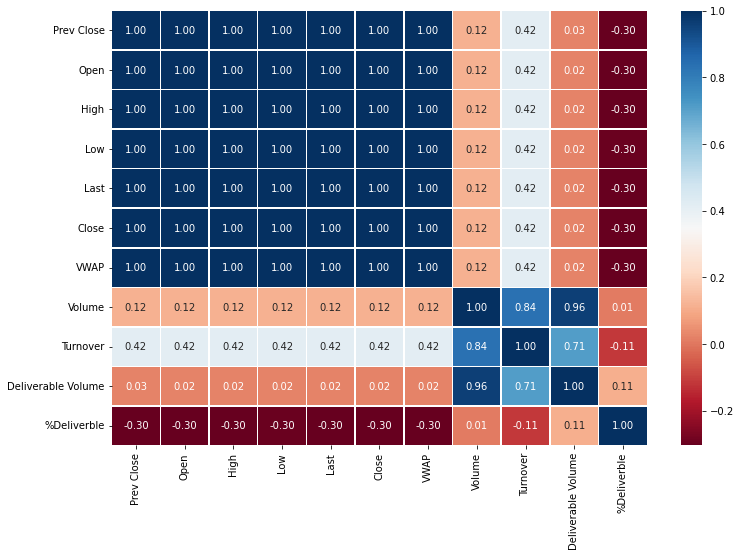

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr_mat,
               annot=True,
               linewidth=0.5,
               cmap="RdBu",
               fmt=".2f")

In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:
          col_name=corr_matrix.columns[i]
          col_corr.add(col_name)

  return col_corr

In [ ]:
corr_features=correlation(X_train,0.8)
corr_features

{'Close',
 'Deliverable Volume',
 'High',
 'Last',
 'Low',
 'Open',
 'Turnover',
 'VWAP'}

In [ ]:
df.drop('Turnover', axis=1, inplace=True)
df.drop('VWAP', axis=1, inplace=True)
df.drop('Last', axis=1, inplace=True)

In [ ]:
len(df.columns)

8

In [ ]:
#### Model

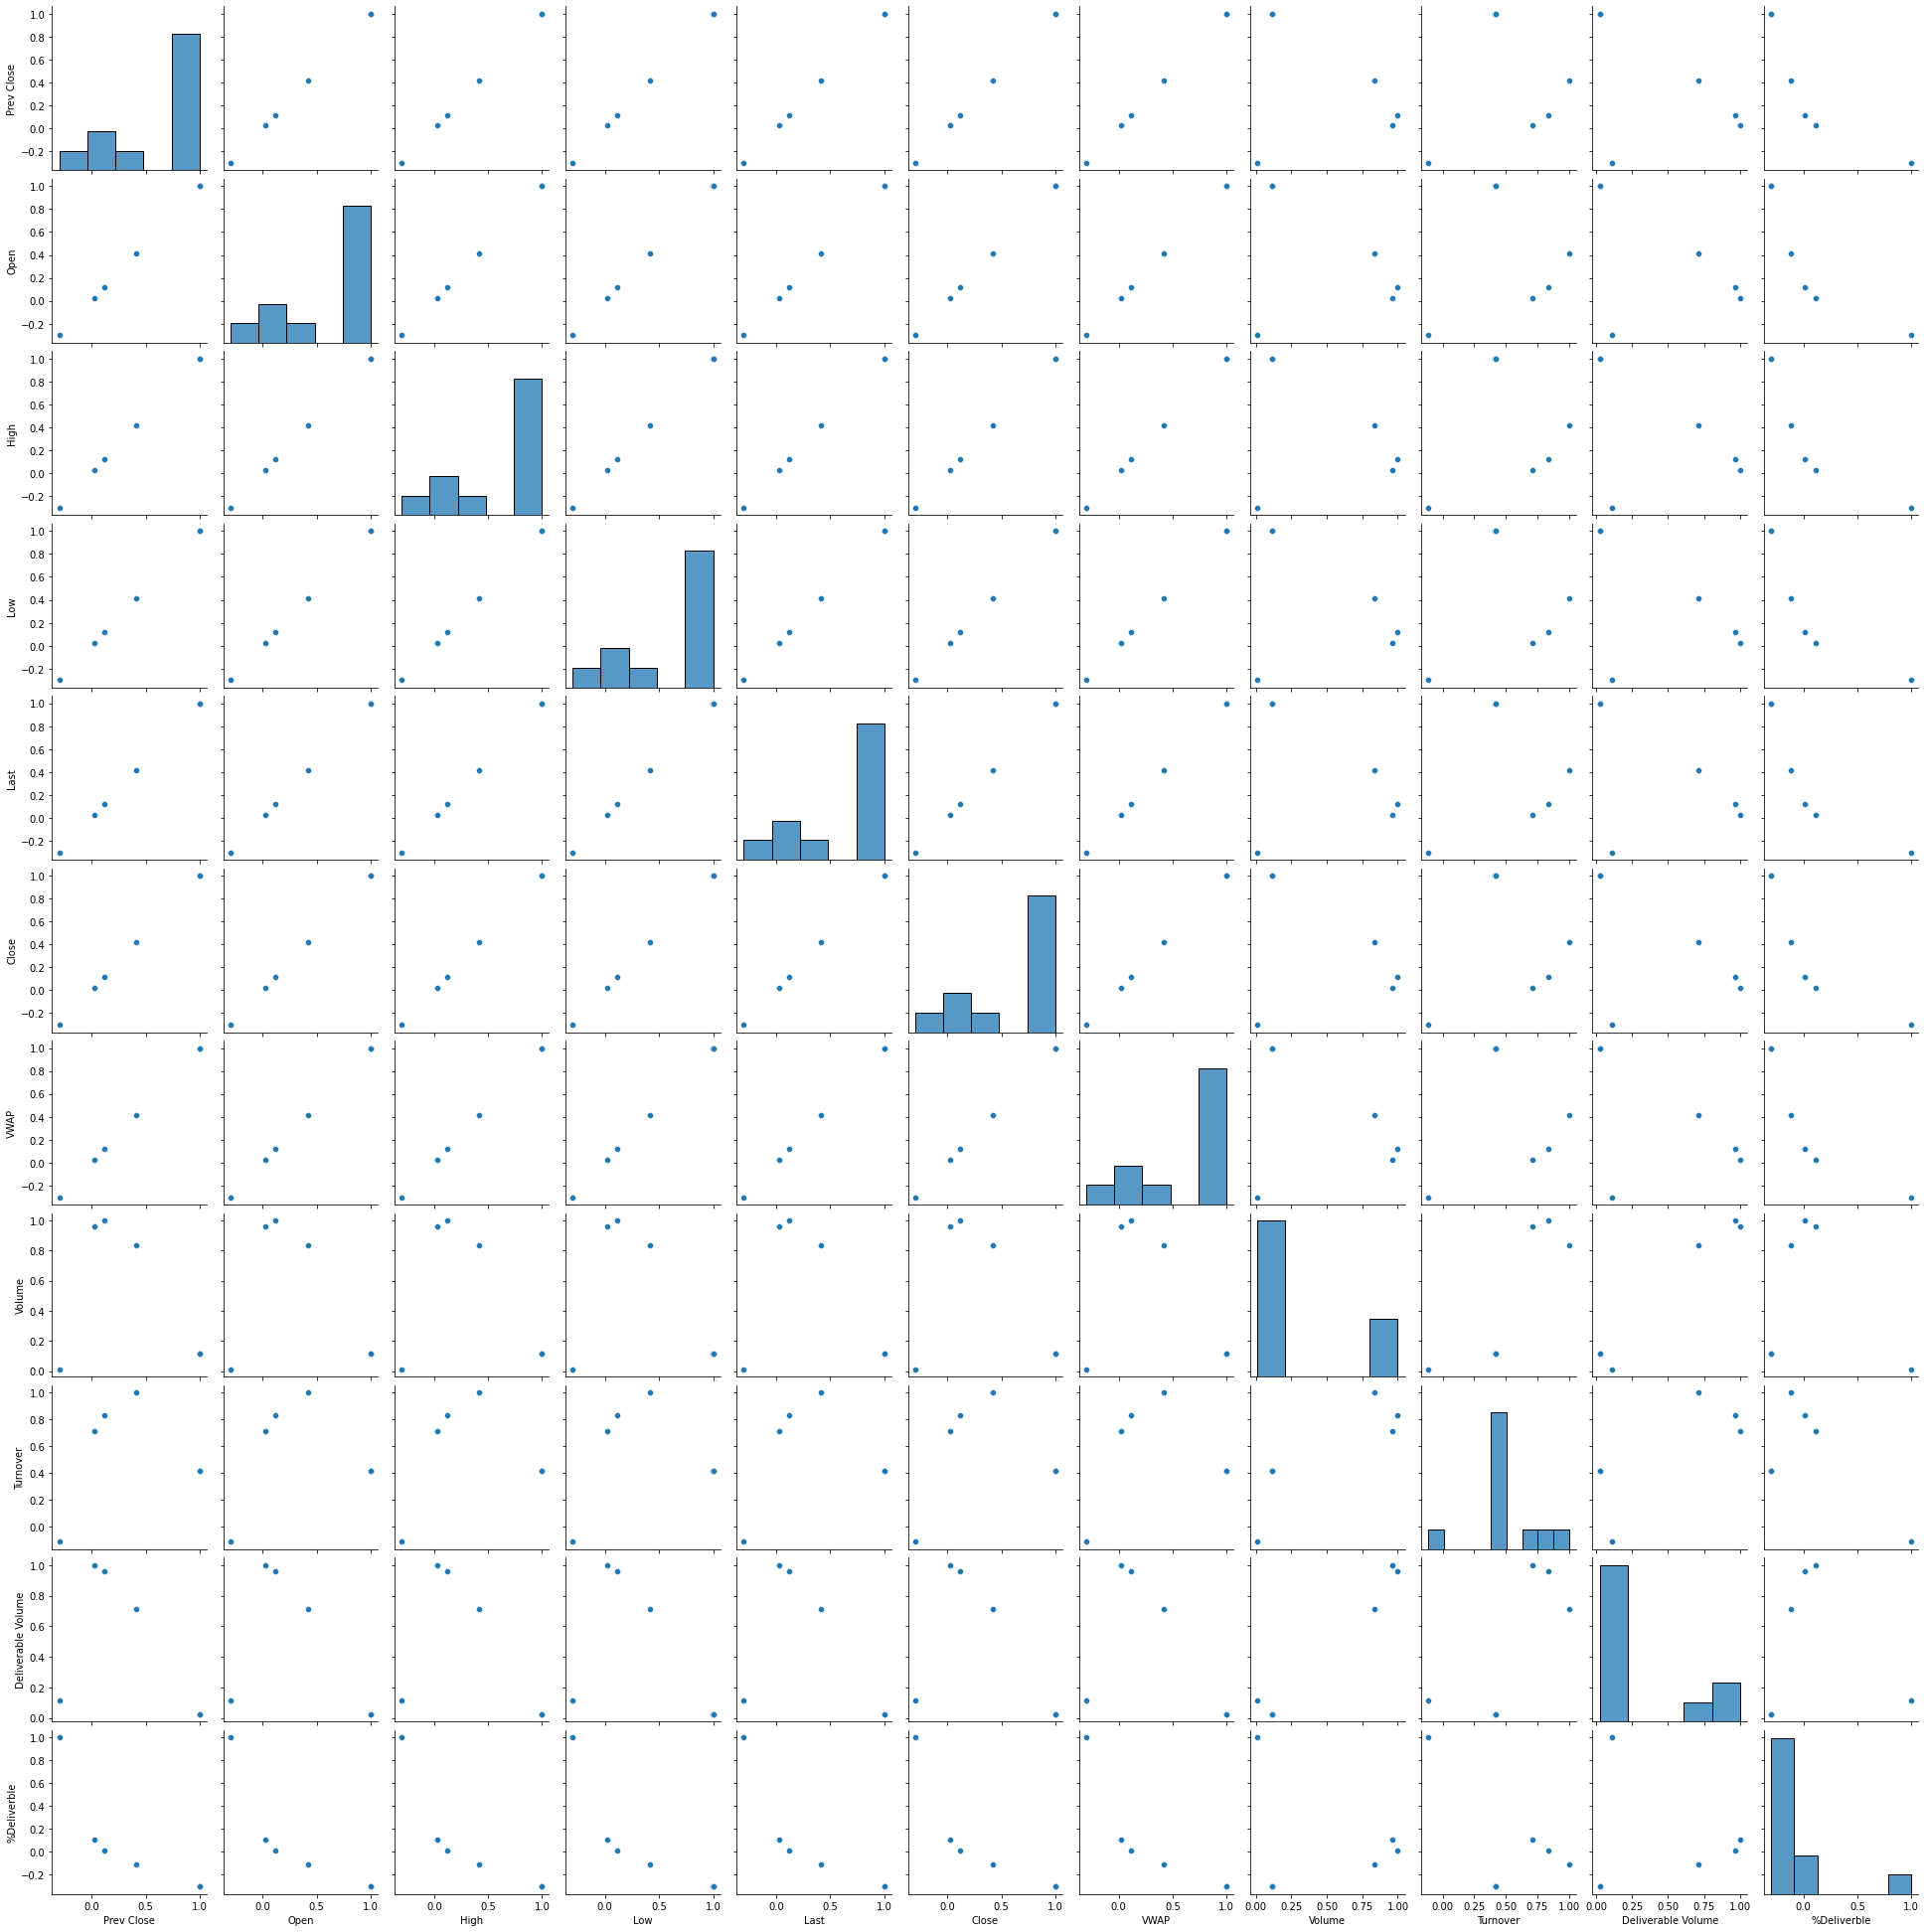

In [ ]:
sns.pairplot(corr_mat)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.score(X_test,Y_test)

0.9999229102502505

In [ ]:
Y_preds=model.predict(X_test)
Y_preds

array([ 339.681 , 1126.9935, 2671.6095, ...,  752.2915,  668.3845,
       1375.4595])

In [ ]:
model.predict([[100,45,1999,273,56,987,187,119,2345,567]])

array([823.925])

In [ ]:
df.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Deliverable Volume', '%Deliverble'],
      dtype='object')